In [1]:
import matplotlib.pyplot as plt
import numpy
from sklearn import datasets
import os
import pandas as pd
import torch

In [2]:
def linear_model(x, w, b):
  return x * w + b


def mse_loss(h, y):
  return torch.mean((h - y) ** 2)

In [15]:
learning_rate = 0.001
n = 50000

x = torch.tensor([50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 110.0, 120.0])
y = torch.tensor([280.0, 305.0, 350.0, 425.0, 480.0, 500.0, 560.0, 630.0])

w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# optimizer = torch.optim.SGD([w, b], lr=learning_rate)
optimizer = torch.optim.Adam([w, b], lr=learning_rate)
for i in range(n):
  h = linear_model(x, w, b)
  loss = mse_loss(h, y)
  loss.backward() # 计算代价 loss 关于 w, b 的偏导数

  # 将手写的梯度下降修改为使用优化器更新参数
  optimizer.step()

  # print(w.grad.data)

  # 清空梯度信息
  optimizer.zero_grad()

  # print(w.grad.data)

  if i % 100 == 0:
    print(f'Epoch: {i}, Loss: {loss.item()}')

print(f'w = {w.item():.3f}, b = {b.item():.3f}')

Epoch: 0, Loss: 113837.609375
Epoch: 100, Loss: 107942.03125
Epoch: 200, Loss: 102275.03125
Epoch: 300, Loss: 96831.5
Epoch: 400, Loss: 91604.296875
Epoch: 500, Loss: 86586.65625
Epoch: 600, Loss: 81771.921875
Epoch: 700, Loss: 77153.9296875
Epoch: 800, Loss: 72726.6875
Epoch: 900, Loss: 68484.3359375
Epoch: 1000, Loss: 64421.31640625
Epoch: 1100, Loss: 60532.3046875
Epoch: 1200, Loss: 56812.12109375
Epoch: 1300, Loss: 53255.8046875
Epoch: 1400, Loss: 49858.578125
Epoch: 1500, Loss: 46615.80078125
Epoch: 1600, Loss: 43523.0
Epoch: 1700, Loss: 40575.84375
Epoch: 1800, Loss: 37770.125
Epoch: 1900, Loss: 35101.765625
Epoch: 2000, Loss: 32566.8125
Epoch: 2100, Loss: 30161.3359375
Epoch: 2200, Loss: 27881.568359375
Epoch: 2300, Loss: 25723.810546875
Epoch: 2400, Loss: 23684.404296875
Epoch: 2500, Loss: 21759.78515625
Epoch: 2600, Loss: 19946.423828125
Epoch: 2700, Loss: 18240.853515625
Epoch: 2800, Loss: 16639.55859375
Epoch: 2900, Loss: 15139.1875
Epoch: 3000, Loss: 13736.2998046875
Epoch:

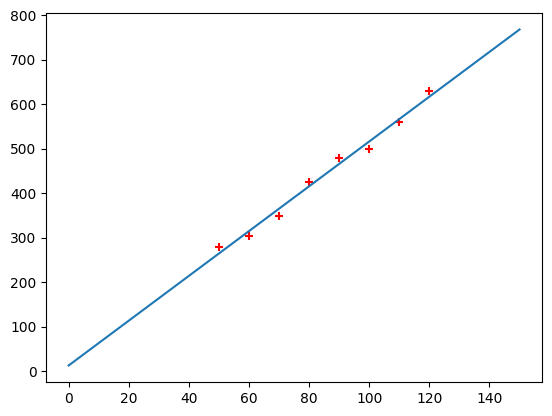

In [16]:
import numpy as np

plt.scatter(x.tolist(), y.tolist(), color="red", marker="+")

new_x = np.linspace(0, 150, 500)
new_y = linear_model(new_x, w.item(), b.item())
plt.plot(new_x, new_y)